In [1]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Input, Dense, Activation, Dropout
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# data loading

In [3]:
data = pd.read_csv("/content/Training Data.csv")
data

,Id,Income,Age,Experience,Married/Single,House_Ownership,Car_Ownership,Profession,CITY,STATE,CURRENT_JOB_YRS,CURRENT_HOUSE_YRS,Risk_Flag
0,1,1303834,23,3,single,rented,no,Mechanical_engineer,Rewa,Madhya_Pradesh,3,13,0
1,2,7574516,40,10,single,rented,no,Software_Developer,Parbhani,Maharashtra,9,13,0
2,3,3991815,66,4,married,rented,no,Technical_writer,Alappuzha,Kerala,4,10,0
3,4,6256451,41,2,single,rented,yes,Software_Developer,Bhubaneswar,Odisha,2,12,1
4,5,5768871,47,11,single,rented,no,Civil_servant,Tiruchirappalli[10],Tamil_Nadu,3,14,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
251995,251996,8154883,43,13,single,rented,no,Surgeon,Kolkata,West_Bengal,6,11,0
251996,251997,2843572,26,10,single,rented,no,Army_officer,Rewa,Madhya_Pradesh,6,11,0
251997,251998,4522448,46,7,single,rented,no,Design_Engineer,Kalyan-Dombivli,Maharashtra,7,12,0
251998,251999,6507128,45,0,single,rented,no,Graphic_Designer,Pondicherry,Puducherry,0,10,0


# EDA - Deskripsi Variabel
* income: Income of the user
* age: Age of the user
* experience: Professional experience of the user in years
* profession: Profession
* married: Whether married or single
* house_ownership: Owned or rented or neither
* car_ownership: Does the person own a car
* currentjobyears: Years of experience in the current job
* currenthouseyears: Number of years in the current residence
* city: City of residence
* state: State of residence
* risk_flag: Defaulted on a loan -> target feature

In [4]:
data.info()
# dari hasil di bawah ini, preprocessing data perlu dilakukan untuk mengubah tipe data
# object agar bertipe numerik .
# tidak ada missing value pada semua variabel

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 252000 entries, 0 to 251999
Data columns (total 13 columns):
 #   Column             Non-Null Count   Dtype 
---  ------             --------------   ----- 
 0   Id                 252000 non-null  int64 
 1   Income             252000 non-null  int64 
 2   Age                252000 non-null  int64 
 3   Experience         252000 non-null  int64 
 4   Married/Single     252000 non-null  object
 5   House_Ownership    252000 non-null  object
 6   Car_Ownership      252000 non-null  object
 7   Profession         252000 non-null  object
 8   CITY               252000 non-null  object
 9   STATE              252000 non-null  object
 10  CURRENT_JOB_YRS    252000 non-null  int64 
 11  CURRENT_HOUSE_YRS  252000 non-null  int64 
 12  Risk_Flag          252000 non-null  int64 
dtypes: int64(7), object(6)
memory usage: 25.0+ MB


In [5]:
data.describe()
# dilihat dari tabel di bawah, bisa disimpulkan bahwa tidak ada missing/error value pada
# numerical features. Nilai minimum pada experience dan CURRENT_JOB_YRS memungkinkan bernilai 0 . 
# sehingga dapat dilanjut pada proses selanjutnya

,Id,Income,Age,Experience,CURRENT_JOB_YRS,CURRENT_HOUSE_YRS,Risk_Flag
count,252000.000000,2.520000e+05,252000.000000,252000.000000,252000.000000,252000.000000,252000.000000
mean,126000.500000,4.997117e+06,49.954071,10.084437,6.333877,11.997794,0.123000
std,72746.278255,2.878311e+06,17.063855,6.002590,3.647053,1.399037,0.328438
min,1.000000,1.031000e+04,21.000000,0.000000,0.000000,10.000000,0.000000
25%,63000.750000,2.503015e+06,35.000000,5.000000,3.000000,11.000000,0.000000
50%,126000.500000,5.000694e+06,50.000000,10.000000,6.000000,12.000000,0.000000
75%,189000.250000,7.477502e+06,65.000000,15.000000,9.000000,13.000000,0.000000
max,252000.000000,9.999938e+06,79.000000,20.000000,14.000000,14.000000,1.000000


## EDA - Memeriksa Outliers
Deteksi outliers dilakukan dengan teknik visualisasi data (boxplot). Kemudian akan ditangani dengan teknik IQR method. IQR adalah singkatan dari Inter Quartile Range.

### dari grafik dibawah dapat disimpulkan bahwa tidak ada outliers pada data

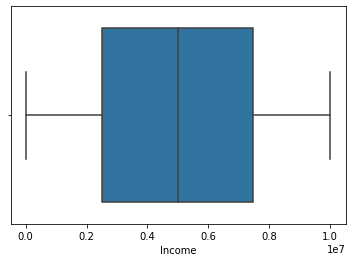

In [6]:
sns.boxplot(x=data['Income'])

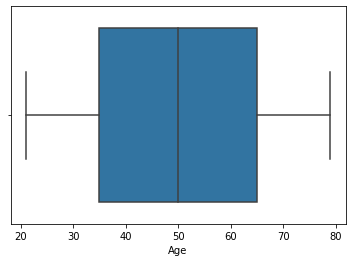

In [7]:
sns.boxplot(x=data['Age'])

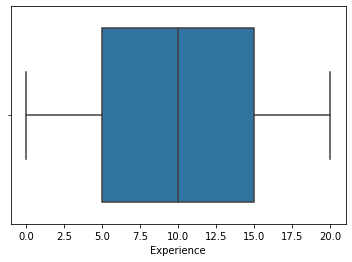

In [8]:
sns.boxplot(x=data['Experience'])

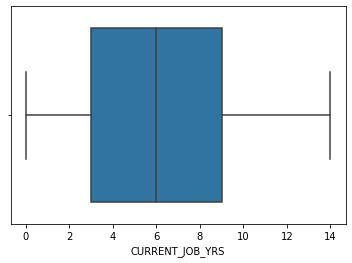

In [9]:
sns.boxplot(x=data['CURRENT_JOB_YRS'])

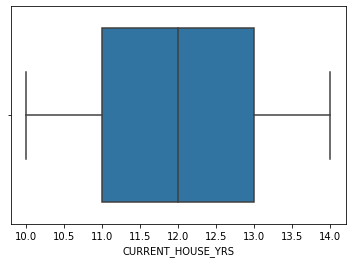

In [10]:
sns.boxplot(x=data['CURRENT_HOUSE_YRS'])

### Univariate Analysis
analisis masing-masing variabel

In [11]:
print(data.columns)

Index(['Id', 'Income', 'Age', 'Experience', 'Married/Single',
       'House_Ownership', 'Car_Ownership', 'Profession', 'CITY', 'STATE',
       'CURRENT_JOB_YRS', 'CURRENT_HOUSE_YRS', 'Risk_Flag'],
      dtype='object')


In [12]:
num_feat = ['Income', 'Age', 'Experience', 'CURRENT_JOB_YRS', 'CURRENT_HOUSE_YRS'] #variabel dg data numerik
cat_feat = ['Married/Single', 'House_Ownership', 'Car_Ownership',  
            'Profession', 'CITY', 'STATE']

### categorical features

         jumlah sampel  persentase
single          226272        89.8
married          25728        10.2


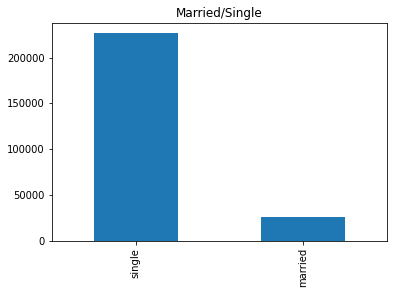

In [13]:
feature = cat_feat[0]
count = data[feature].value_counts()
percent = 100*data[feature].value_counts(normalize=True)
df = pd.DataFrame({'jumlah sampel':count, 'persentase':percent.round(1)})
print(df)
count.plot(kind='bar', title=feature);
# dari grafik dibawah menunjukkan bahwa mayoritas sample adalah single person

              jumlah sampel  persentase
rented               231898        92.0
owned                 12918         5.1
norent_noown           7184         2.9


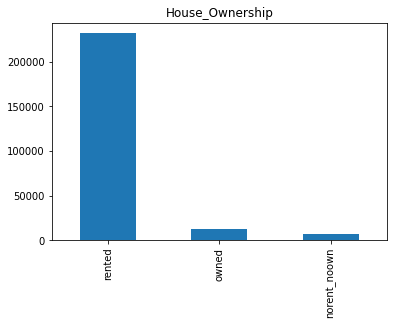

In [14]:
feature = cat_feat[1]
count = data[feature].value_counts()
percent = 100*data[feature].value_counts(normalize=True)
df = pd.DataFrame({'jumlah sampel':count, 'persentase':percent.round(1)})
print(df)
count.plot(kind='bar', title=feature);
#mayoritas sample tidak memiliki rumah sendiri

     jumlah sampel  persentase
no          176000        69.8
yes          76000        30.2


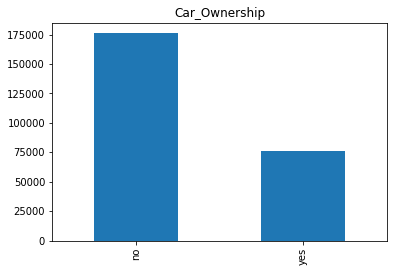

In [15]:
feature = cat_feat[2]
count = data[feature].value_counts()
percent = 100*data[feature].value_counts(normalize=True)
df = pd.DataFrame({'jumlah sampel':count, 'persentase':percent.round(1)})
print(df)
count.plot(kind='bar', title=feature);
# mayoritas sample tidak memiliki mobil sendiri

                            jumlah sampel  persentase
Physician                            5957         2.4
Statistician                         5806         2.3
Web_designer                         5397         2.1
Psychologist                         5390         2.1
Computer_hardware_engineer           5372         2.1
Drafter                              5359         2.1
Magistrate                           5357         2.1
Fashion_Designer                     5304         2.1
Air_traffic_controller               5281         2.1
Comedian                             5259         2.1
Industrial_Engineer                  5250         2.1
Mechanical_engineer                  5217         2.1
Chemical_engineer                    5205         2.1
Technical_writer                     5195         2.1
Hotel_Manager                        5178         2.1
Financial_Analyst                    5167         2.1
Graphic_Designer                     5166         2.1
Flight_attendant            

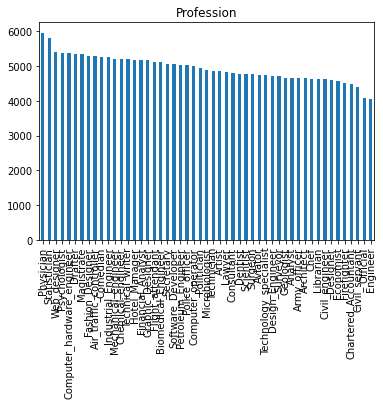

In [16]:
feature = cat_feat[3]
count = data[feature].value_counts()
percent = 100*data[feature].value_counts(normalize=True)
df = pd.DataFrame({'jumlah sampel':count, 'persentase':percent.round(1)})
print(df)
count.plot(kind='bar', title=feature);
# profesi sample terdisdribusi merata, masing-masing terdiri dari range 1,6%-2%

                  jumlah sampel  persentase
Vijayanagaram              1259         0.5
Bhopal                     1208         0.5
Bulandshahr                1185         0.5
Saharsa[29]                1180         0.5
Vijayawada                 1172         0.5
...                         ...         ...
Ujjain                      486         0.2
Warangal[11][12]            459         0.2
Bettiah[33]                 457         0.2
Katni                       448         0.2
Karaikudi                   431         0.2

[317 rows x 2 columns]


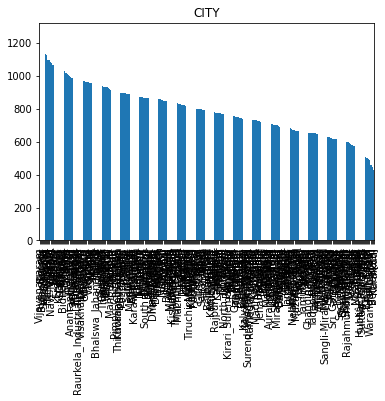

In [17]:
feature = cat_feat[4]
count = data[feature].value_counts()
percent = 100*data[feature].value_counts(normalize=True)
df = pd.DataFrame({'jumlah sampel':count, 'persentase':percent.round(1)})
print(df)
count.plot(kind='bar', title=feature);
# variabel city memiliki nilai yang beragam yaitu 317 nilai berbeda.
# jika variabel ini digunakan sebagai fitur maka akan terdiri dari
# banyak kolom apabila dilakukan one hot encoding, sehingga variabel ini akan di drop
# lebih baik menggunakan variabel provinsi atau state agar distinct value lebih sedikit

                   jumlah sampel  persentase
Uttar_Pradesh              28400        11.3
Maharashtra                25562        10.1
Andhra_Pradesh             25297        10.0
West_Bengal                23483         9.3
Bihar                      19780         7.8
Tamil_Nadu                 16537         6.6
Madhya_Pradesh             14122         5.6
Karnataka                  11855         4.7
Gujarat                    11408         4.5
Rajasthan                   9174         3.6
Jharkhand                   8965         3.6
Haryana                     7890         3.1
Telangana                   7524         3.0
Assam                       7062         2.8
Kerala                      5805         2.3
Delhi                       5490         2.2
Punjab                      4720         1.9
Odisha                      4658         1.8
Chhattisgarh                3834         1.5
Uttarakhand                 1874         0.7
Jammu_and_Kashmir           1780         0.7
Puducherry

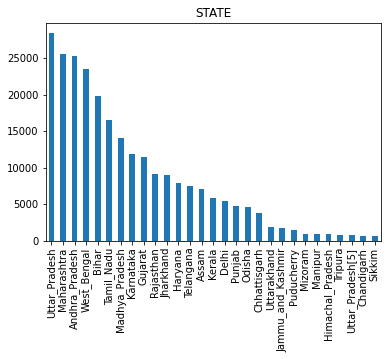

In [18]:
feature = cat_feat[5]
count = data[feature].value_counts()
percent = 100*data[feature].value_counts(normalize=True)
df = pd.DataFrame({'jumlah sampel':count, 'persentase':percent.round(1)})
print(df)
count.plot(kind='bar', title=feature);
# variabel ini akan digunakan sebagai fitur untuk 
# menggantikan variabel CITY, karena memiliki distinct value
# lebih sedikit dari city, sehingga nanti akan dilakukan one hot encoding

In [19]:
# drop ID, dan CITY
data.drop(['Id', 'CITY'], inplace=True, axis=1)
data.head()

,Income,Age,Experience,Married/Single,House_Ownership,Car_Ownership,Profession,STATE,CURRENT_JOB_YRS,CURRENT_HOUSE_YRS,Risk_Flag
0,1303834,23,3,single,rented,no,Mechanical_engineer,Madhya_Pradesh,3,13,0
1,7574516,40,10,single,rented,no,Software_Developer,Maharashtra,9,13,0
2,3991815,66,4,married,rented,no,Technical_writer,Kerala,4,10,0
3,6256451,41,2,single,rented,yes,Software_Developer,Odisha,2,12,1
4,5768871,47,11,single,rented,no,Civil_servant,Tamil_Nadu,3,14,1


### numerical features

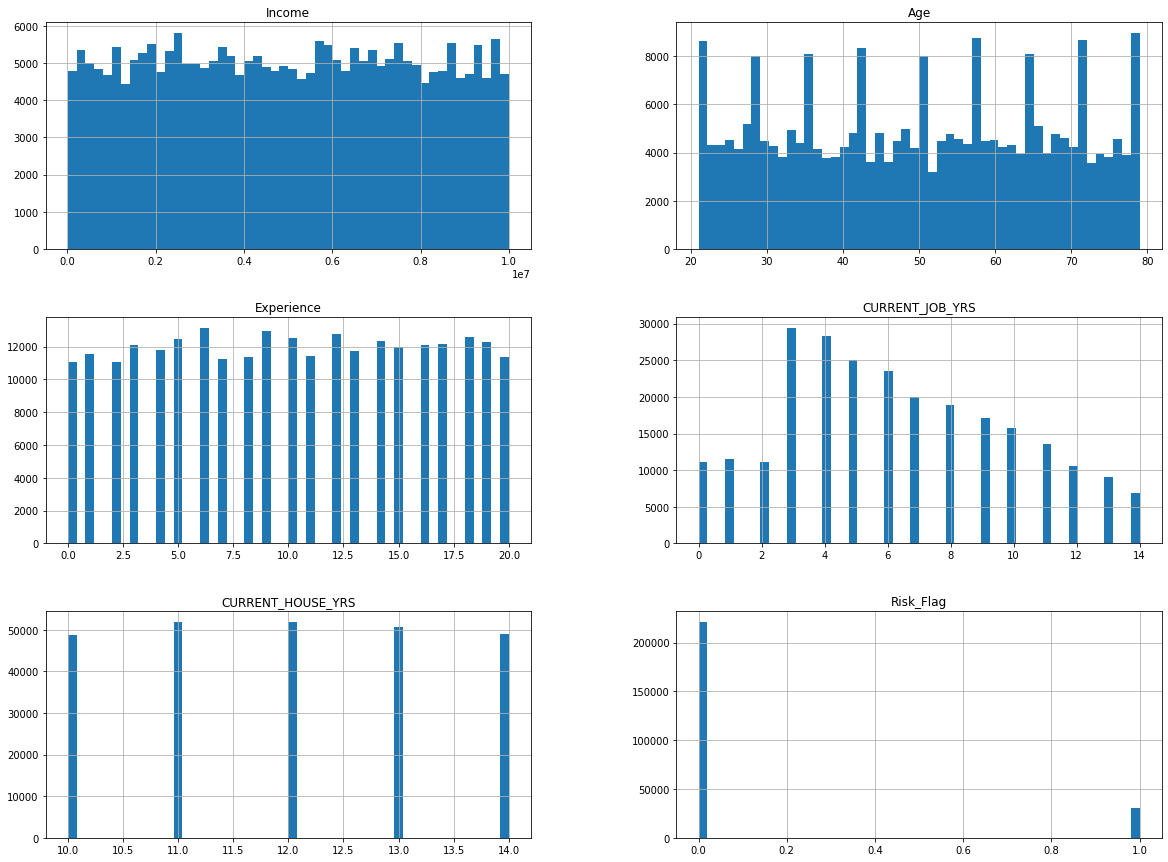

In [20]:
data.hist(bins=50, figsize=(20,15))
plt.show()
# mayoritas variabel memiliki distribusi yg merata terhadap sample data
# semakin tinggi job years, terjadi penurunan sample data

### multivariate analysis

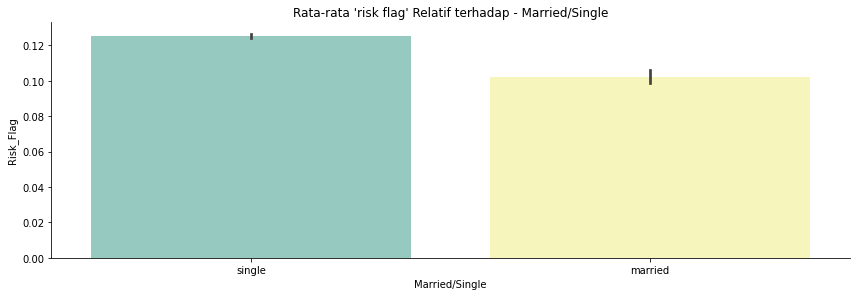

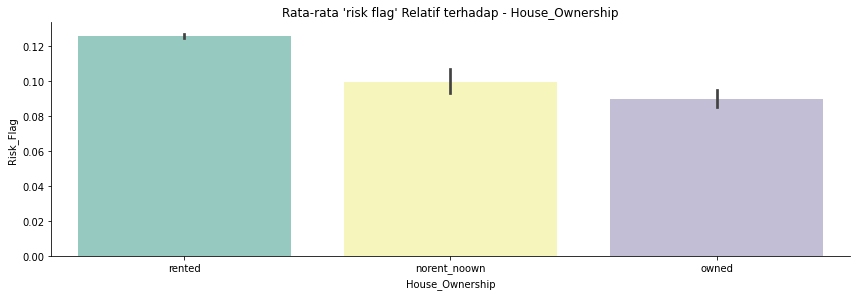

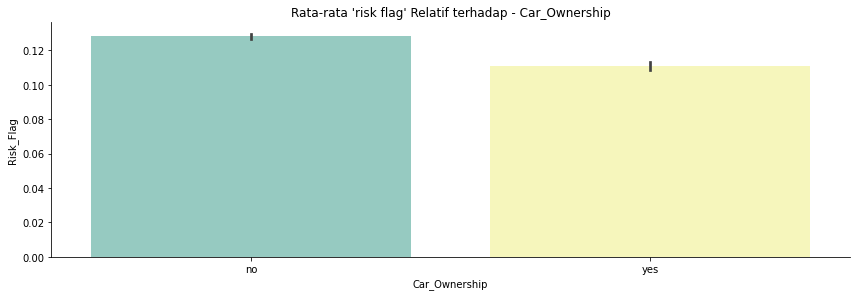

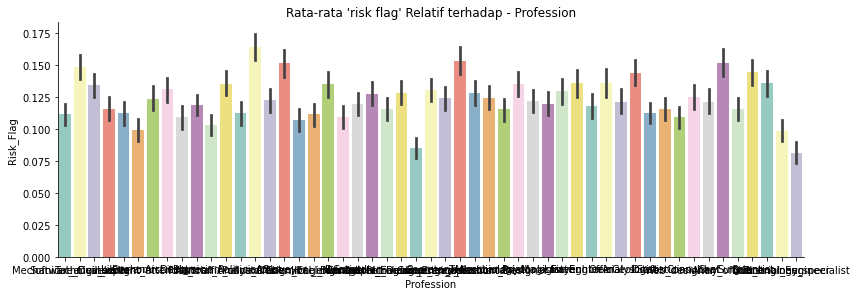

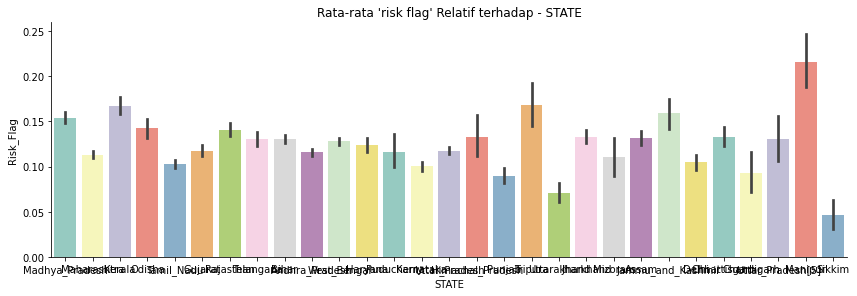

In [22]:
# categorical features
cat_features = data.select_dtypes(include='object').columns.to_list()
 
for col in cat_features:
  sns.catplot(x=col, y="Risk_Flag", kind="bar", dodge=False, height = 4, aspect = 3,  data=data, palette="Set3")
  plt.title("Rata-rata 'risk flag' Relatif terhadap - {}".format(col))

### Kesimpulan



1.   single lebih tinggi resiko gagal bayar hutang
2.   rented house lebih tinggi resiko gagal bayar hutang, dan owned house kebalikannya
3. yg tidak memiliki mobil lebih berisiko gagal bayar
4. terdapat beberapa profesi yg memiliki risiko lebih tinggi
5. terdapat beberapa State yg memiliki risiko lebih tinggi

karena kelima categorical fitur diatas mempengaruhi tingkat resiko gagal bayar, sehingga kelima variabel akan menjadi features






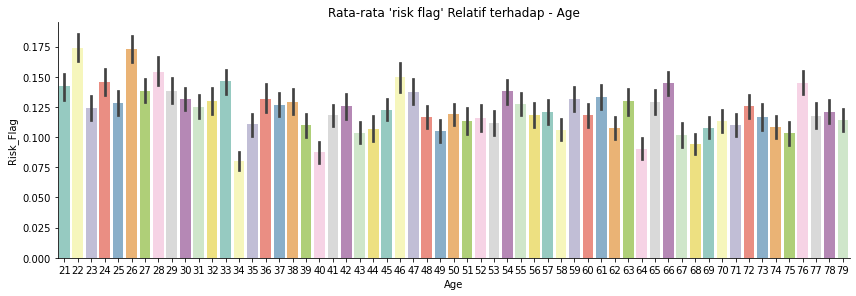

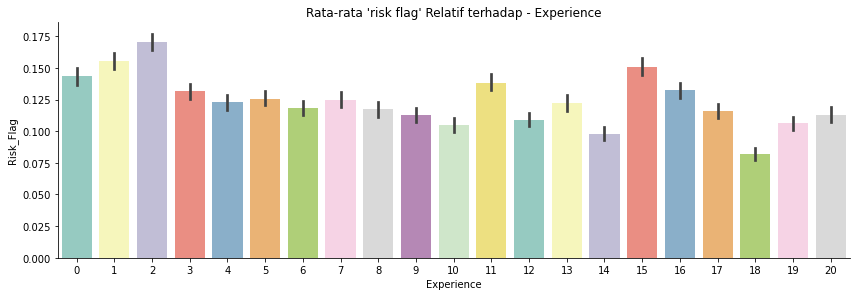

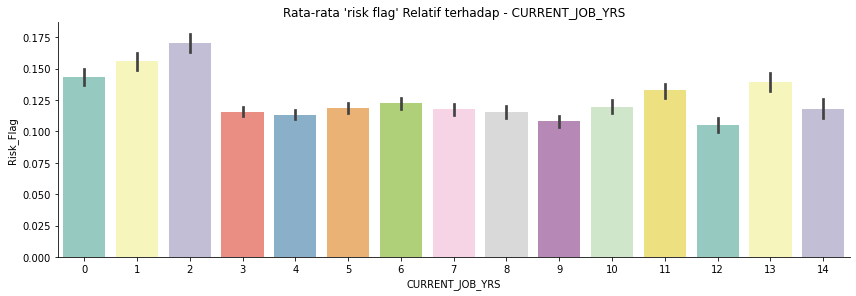

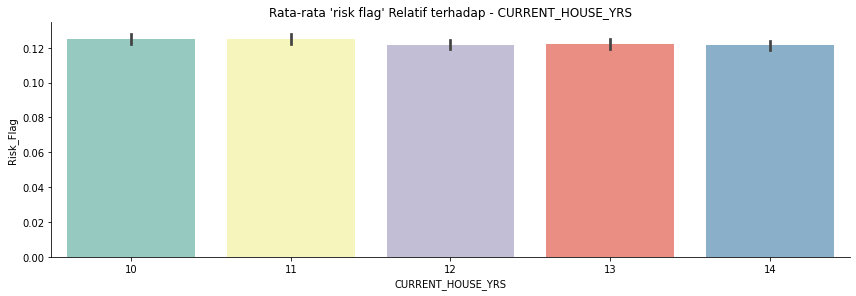

In [24]:
#numerical variabel
# pada visualisasi ini income tidak divisualisasikan karena memerlukan waktu komputasi yg lama
numerical_feat = ['Age', 'Experience', 'CURRENT_JOB_YRS', 'CURRENT_HOUSE_YRS']
for col in numerical_feat:
  sns.catplot(x=col, y="Risk_Flag", kind="bar", dodge=False, height = 4, aspect = 3,  data=data, palette="Set3")
  plt.title("Rata-rata 'risk flag' Relatif terhadap - {}".format(col))

### Kesimpulan 

1.   semakin tinggi Age, Experience, CURRENT_JOB_YRS, CURRENT_HOUSE_YRS, maka resiko gagal bayar semakin rendah
2.   variabel diatas berkorelasi dengan risk flag sehingga dapat menjadi fitur untuk clasifikasi



## Data Preparation

### Encoding fitur kategori

In [27]:
from sklearn.preprocessing import  OneHotEncoder
data = pd.concat([data, pd.get_dummies(data['Married/Single'], prefix='married')],axis=1)
data = pd.concat([data, pd.get_dummies(data['House_Ownership'], prefix='house')],axis=1)
data = pd.concat([data, pd.get_dummies(data['Car_Ownership'], prefix='car')],axis=1)
data = pd.concat([data, pd.get_dummies(data['Profession'], prefix='job')],axis=1)
data = pd.concat([data, pd.get_dummies(data['STATE'], prefix='state')],axis=1)
data.drop(['Married/Single', 'House_Ownership', 'Car_Ownership', 
            'Profession', 'STATE'], axis=1, inplace=True)
data

,Income,Age,Experience,CURRENT_JOB_YRS,CURRENT_HOUSE_YRS,Risk_Flag,married_married,married_single,house_norent_noown,house_owned,...,state_Punjab,state_Rajasthan,state_Sikkim,state_Tamil_Nadu,state_Telangana,state_Tripura,state_Uttar_Pradesh,state_Uttar_Pradesh[5],state_Uttarakhand,state_West_Bengal
0,1303834,23,3,3,13,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
1,7574516,40,10,9,13,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
2,3991815,66,4,4,10,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,6256451,41,2,2,12,1,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
4,5768871,47,11,3,14,1,0,1,0,0,...,0,0,0,1,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
251995,8154883,43,13,6,11,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,1
251996,2843572,26,10,6,11,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
251997,4522448,46,7,7,12,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
251998,6507128,45,0,0,10,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0


In [28]:
X = data.drop(["Risk_Flag"],axis =1) # features
y = data["Risk_Flag"] #tareget

'\nfrom imblearn.over_sampling import RandomOverSampler\nros = RandomOverSampler()\nX1, y1 = ros.fit_resample(X,y)\ny1.value_counts()\n'

In [29]:
#standarisasi agar nilai mean dan std 0 dan 1
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaler.fit(X[num_feat])
X[num_feat] = scaler.transform(X.loc[:, num_feat])
X[num_feat].head()

,Income,Age,Experience,CURRENT_JOB_YRS,CURRENT_HOUSE_YRS
0,-1.283145,-1.579604,-1.180232,-0.914131,0.716356
1,0.895457,-0.583344,-0.014067,0.731036,0.716356
2,-0.349269,0.940348,-1.013637,-0.639936,-1.427981
3,0.437526,-0.524740,-1.346827,-1.188325,0.001577
4,0.268128,-0.173119,0.152528,-0.914131,1.431135


In [30]:
#memastikan bahwa mean = 0 dan std= 1
X[num_feat].describe().round(4)

,Income,Age,Experience,CURRENT_JOB_YRS,CURRENT_HOUSE_YRS
count,252000.0000,252000.0000,252000.0000,252000.0000,252000.0000
mean,0.0000,-0.0000,0.0000,-0.0000,-0.0000
std,1.0000,1.0000,1.0000,1.0000,1.0000
min,-1.7325,-1.6968,-1.6800,-1.7367,-1.4280
25%,-0.8665,-0.8764,-0.8470,-0.9141,-0.7132
50%,0.0012,0.0027,-0.0141,-0.0915,0.0016
75%,0.8618,0.8817,0.8189,0.7310,0.7164
max,1.7381,1.7022,1.6519,2.1020,1.4311


In [31]:
#pembagian data latih dan data uji. dengan rasio 9:1
from sklearn.model_selection import train_test_split

x_train,x_test,y_train,y_test= train_test_split(X, y, test_size=0.1, random_state=42)
print(f'Total # of sample in whole dataset: {len(X)}')
print(f'Total # of sample in train dataset: {len(x_train)}')
print(f'Total # of sample in test dataset: {len(x_test)}')

Total # of sample in whole dataset: 252000
Total # of sample in train dataset: 226800
Total # of sample in test dataset: 25200


In [32]:
#melakukan oversampling karena distribusi target value tidak merata, nilai 0 jauh lebih banyak daripada 1
from imblearn.over_sampling import RandomOverSampler
ros = RandomOverSampler()
X1, y1 = ros.fit_resample(x_train,y_train)
y1.value_counts()

0    198943
1    198943
Name: Risk_Flag, dtype: int64

# Model Development
1. Random forest
2. neural network

In [34]:
# fitting training data dengan model random forest
from sklearn.ensemble import RandomForestClassifier
model= RandomForestClassifier(criterion='gini',random_state=42)
model.fit(X1,y1)
predict_rf= model.predict(x_test)

In [35]:
from sklearn.metrics import confusion_matrix,accuracy_score,classification_report

#confusion matrix
print(f"Confusion Matrix: \n {confusion_matrix(predict_rf,y_test)}\n")

#classification matrix
print(classification_report(predict_rf,y_test))

#Accuracy
print(f"Accuracy Score: {accuracy_score(predict_rf,y_test)* 100:.2f}%")

Confusion Matrix: 
 [[20129   753]
 [ 1932  2386]]

              precision    recall  f1-score   support

           0       0.91      0.96      0.94     20882
           1       0.76      0.55      0.64      4318

    accuracy                           0.89     25200
   macro avg       0.84      0.76      0.79     25200
weighted avg       0.89      0.89      0.89     25200

Accuracy Score: 89.35%


In [42]:
# create and fit a Baseline Neural Network Model
model = Sequential()
model.add(Dense(128, activation='relu', input_dim=92))
#model.add(Dense(units=64, activation='relu'))
model.add(Dense(units=32, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(1, activation='sigmoid'))

model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_6 (Dense)             (None, 128)               11904     
                                                                 
 dense_7 (Dense)             (None, 32)                4128      
                                                                 
 dropout_2 (Dropout)         (None, 32)                0         
                                                                 
 dense_8 (Dense)             (None, 1)                 33        
                                                                 
Total params: 16,065
Trainable params: 16,065
Non-trainable params: 0
_________________________________________________________________


In [43]:
model.compile(metrics =['accuracy'], loss='binary_crossentropy', optimizer='adam')
model.fit(x_train, y_train, epochs=20, batch_size=1500, verbose=1)

Epoch 1/20
152/152 [==============================] - 2s 8ms/step - loss: 0.3914 - accuracy: 0.8749
Epoch 2/20
152/152 [==============================] - 1s 8ms/step - loss: 0.3673 - accuracy: 0.8772
Epoch 3/20
152/152 [==============================] - 1s 8ms/step - loss: 0.3564 - accuracy: 0.8772
Epoch 4/20
152/152 [==============================] - 1s 8ms/step - loss: 0.3398 - accuracy: 0.8773
Epoch 5/20
152/152 [==============================] - 1s 8ms/step - loss: 0.3206 - accuracy: 0.8784
Epoch 6/20
152/152 [==============================] - 1s 8ms/step - loss: 0.3026 - accuracy: 0.8811
Epoch 7/20
152/152 [==============================] - 1s 8ms/step - loss: 0.2875 - accuracy: 0.8841
Epoch 8/20
152/152 [==============================] - 1s 8ms/step - loss: 0.2757 - accuracy: 0.8869
Epoch 9/20
152/152 [==============================] - 1s 8ms/step - loss: 0.2671 - accuracy: 0.8887
Epoch 10/20
152/152 [==============================] - 1s 8ms/step - loss: 0.2602 - accuracy: 0.8906

In [44]:
# uji model neural network dengan data uji
y_pred = model.predict(x_test)
y_pred = (y_pred > 0.5) # mengubah nilai menjadi true (1) jika > 0,5

In [45]:
from sklearn.metrics import confusion_matrix,accuracy_score,classification_report

#confusion matrix
print(f"Confusion Matrix: \n {confusion_matrix(y_pred,y_test)}\n")

#classification matrix
print(classification_report(y_pred,y_test))

#Accuracy
print(f"Accuracy Score: {accuracy_score(y_pred,y_test)* 100:.2f}%")

Confusion Matrix: 
 [[21204  1941]
 [  857  1198]]

              precision    recall  f1-score   support

       False       0.96      0.92      0.94     23145
        True       0.38      0.58      0.46      2055

    accuracy                           0.89     25200
   macro avg       0.67      0.75      0.70     25200
weighted avg       0.91      0.89      0.90     25200

Accuracy Score: 88.90%


# kesimpulan:
dari 2 model yg dijalankan, berdasarkan akurasi diperoleh bahwa model random forest mengklasifikasikan loan risk lebih baik daripada neural network model